In [18]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import xlsxwriter

#from google.colab import drive
#from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer
# Required Libraries
import os


In [50]:
dataset = pd.DataFrame()
file = pd.ExcelFile('data_promethee\ELECTRE_Tree_B.xlsx')
sheets_list = ['MT', 'V1', 'V2', 'V3', 'Planilha1']
for sheet in sheets_list:
    if 'Planilha1' != sheet:
        temp_df = pd.read_excel(file, sheet_name=sheet)
        dataset = pd.concat([dataset, temp_df])
first_list = temp_df.columns.tolist()
temp_df = dataset.reset_index(drop=True)
#dataset.head()
len(dataset)

392

In [51]:
identify_numbers_animals = lambda x, y: [(str(tipo_venda), len(x.loc[x['tipo_venda']==str(tipo_venda),'idanimal'].unique())) for tipo_venda in y]

In [52]:
dataset = dataset.dropna().reset_index(drop=True)
tipo_venda_arrays = dataset['tipo_venda'].unique()
identify_numbers_animals(dataset, tipo_venda_arrays)

[('MT', 98), ('V1', 98), ('V2', 98), ('V3', 98)]

In [55]:
mt = dataset.loc[dataset['tipo_venda'] == 'MT']
len(mt)

98

In [59]:
identify_numbers_animals = lambda x, y: [(str(EC_PROMETHEE), len(x.loc[x['EC_PROMETHEE']==int(EC_PROMETHEE),'idanimal'].unique())) for EC_PROMETHEE in y]

In [60]:
mt = mt.dropna().reset_index(drop=True)
promethee_group_arrays = mt['EC_PROMETHEE'].unique()
#print(promethee_group_arrays)
identify_numbers_animals(mt, promethee_group_arrays )

[('1', 8), ('2', 50), ('3', 40)]

In [61]:
promethee_group_model = dataset.groupby('EC_PROMETHEE')
promethee_group_list = [promethee_group_model.get_group(x) for x in promethee_group_model.groups]

In [62]:
for EC_PROMETHEE in promethee_group_list:
  temp_df = EC_PROMETHEE.reset_index(drop=True)
  print(temp_df['EC_PROMETHEE'].unique()[0], "\n")
  print(temp_df.describe())
  print()

1 

           idlote      idanimal       tempo      venda       Baia  \
count   22.000000     22.000000   22.000000  22.000000  22.000000   
mean   162.181818  12097.363636  103.045455   1.590909  26.636364   
std     34.246496   2589.729542   29.724893   0.734140   4.030189   
min     16.000000   1051.000000   31.000000   1.000000  12.000000   
25%    159.000000  11704.000000  100.000000   1.000000  25.000000   
50%    165.000000  12482.500000  100.000000   1.000000  26.000000   
75%    178.750000  13299.750000  116.000000   2.000000  30.000000   
max    188.000000  14087.000000  150.000000   3.000000  30.000000   

       Peso_inicial  Peso_final        GMD         RC  \
count     22.000000   22.000000  22.000000  22.000000   
mean     437.363636  636.066111   1.981003  55.025000   
std       29.649613   42.543073   0.360099   1.343535   
min      403.000000  553.469100   1.165227  52.212100   
25%      415.750000  616.216850   1.749824  54.500000   
50%      425.000000  640.176220 

In [48]:
identify_numbers_animals = lambda x, y: [(str(EC_PROMETHEE), len(x.loc[x['EC_PROMETHEE']==int(EC_PROMETHEE),'idanimal'].unique())) for EC_PROMETHEE in y]

In [49]:
dataset = dataset.dropna().reset_index(drop=True)
promethee_group_arrays = dataset['EC_PROMETHEE'].unique()
#print(promethee_group_arrays)
identify_numbers_animals(dataset, promethee_group_arrays )

[('1', 20), ('2', 83), ('3', 77)]

In [43]:
promethee_group_model = dataset.groupby('EC_PROMETHEE')
promethee_group_list = [promethee_group_model.get_group(x) for x in promethee_group_model.groups]

In [44]:
for EC_PROMETHEE in promethee_group_list:
  temp_df = EC_PROMETHEE.reset_index(drop=True)
  print(temp_df['EC_PROMETHEE'].unique()[0], "\n")
  print(temp_df.describe())
  print()

1 

           idlote      idanimal       tempo      venda       Baia  \
count   22.000000     22.000000   22.000000  22.000000  22.000000   
mean   162.181818  12097.363636  103.045455   1.590909  26.636364   
std     34.246496   2589.729542   29.724893   0.734140   4.030189   
min     16.000000   1051.000000   31.000000   1.000000  12.000000   
25%    159.000000  11704.000000  100.000000   1.000000  25.000000   
50%    165.000000  12482.500000  100.000000   1.000000  26.000000   
75%    178.750000  13299.750000  116.000000   2.000000  30.000000   
max    188.000000  14087.000000  150.000000   3.000000  30.000000   

       Peso_inicial  Peso_final        GMD         RC  \
count     22.000000   22.000000  22.000000  22.000000   
mean     437.363636  636.066111   1.981003  55.025000   
std       29.649613   42.543073   0.360099   1.343535   
min      403.000000  553.469100   1.165227  52.212100   
25%      415.750000  616.216850   1.749824  54.500000   
50%      425.000000  640.176220 

In [40]:
idanimal_model.head()

,idlote,idanimal,tipo_venda,tempo,venda,Baia,Genero,genotipo,Peso_inicial,Peso_final,...,acum_marginal_net_value,Peso_arrobas,eficiencia_energeticaCEM_prod,custo_acum,co2eq_emission,eficiencia_ambientalCO2eq_prod,ecc,CMSPV,ingestao_agua,EC_PROMETHEE
0,16,1051,MT,100,1,27,MACHO INTEIRO,NELORE,410,639.725039,...,176.323600,22.283756,354.361199,856.8,10.015769,115.611560,6,1.919940,458.193161,1
1,159,11674,MT,100,1,30,MACHO INTEIRO,CRUZADO,424,655.257000,...,508.881611,22.855400,367.682400,1195.0,10.254100,120.647400,4,1.927100,476.942200,1
2,159,11684,MT,100,1,30,MACHO INTEIRO,CRUZADO,414,658.546700,...,802.293231,22.970100,348.441100,1455.0,10.287700,114.424700,4,1.930300,452.528000,1
3,159,11704,MT,100,1,30,MACHO INTEIRO,CRUZADO,448,665.846400,...,274.216963,23.224700,422.561300,940.0,10.362300,137.986300,4,1.907800,543.773700,1
4,165,12476,MT,100,1,25,MACHO INTEIRO,CRUZADO LEITEIRO,503,706.731500,...,300.714346,24.650800,427.649000,630.0,10.779100,138.574500,5,1.875400,542.668000,1
8,16,1029,MT,100,1,27,MACHO INTEIRO,NELORE,442,685.902322,...,198.089813,23.892264,325.197277,624.0,10.483195,105.557657,5,1.900831,416.851995,2
9,16,1044,MT,100,1,27,MACHO INTEIRO,CRUZADO LEITEIRO GIR,412,574.809897,...,-41.471694,19.658498,473.823056,303.8,9.355781,156.690400,6,1.964942,626.142159,2
10,16,1045,MT,100,1,27,MACHO INTEIRO,NELORE,427,651.766550,...,139.449712,22.703201,325.651097,970.0,10.137802,106.183353,6,1.918211,420.568305,2
11,16,1048,MT,100,1,27,MACHO INTEIRO,NELORE,444,669.603780,...,112.306605,23.324532,340.006985,730.8,10.318379,110.443438,7,1.903638,436.396824,2
12,16,1052,MT,100,1,27,MACHO INTEIRO,NELORE,412,610.588655,...,173.540164,21.268838,328.159725,1019.2,9.720013,107.976258,5,1.950243,430.010793,2


In [6]:
tipo_venda_arrays = dados_estruturados_df['tipo_venda'].unique()
identify_numbers_animals(dados_estruturados_df, tipo_venda_arrays)

[('MT', 98), ('V1', 98), ('V2', 98), ('V3', 98)]

In [7]:
vars_list = ['Peso_inicial',
             'Peso_final',
             'GMD',
             'RC',
             'acum_marginal_net_value',
             'Peso_arrobas',
             'eficiencia_energeticaCEM_prod',
             'custo_acum',
             'co2eq_emission',
             'eficiencia_ambientalCO2eq_prod',
             'ecc',
             'CMSPV',
             'ingestao_agua']

In [8]:
tipo_venda_model = dados_estruturados_df.groupby('tipo_venda')
tipo_venda_list = [tipo_venda_model.get_group(x) for x in tipo_venda_model.groups]

In [9]:
for tipo_venda in tipo_venda_list:
  temp_df = tipo_venda.reset_index(drop=True)
  print(temp_df['tipo_venda'].unique()[0], "\n")
  print(temp_df.describe())
  print()

MT 

           idlote      idanimal  tempo  venda       Baia  Peso_inicial  \
count   98.000000     98.000000   98.0   98.0  98.000000     98.000000   
mean   152.693878  11370.387755  100.0    1.0  23.397959    425.418367   
std     55.019098   4135.222039    0.0    0.0   7.138887     26.283907   
min     11.000000   1029.000000  100.0    1.0   9.000000    400.000000   
25%    159.250000  11704.250000  100.0    1.0  15.250000    405.250000   
50%    165.000000  12532.000000  100.0    1.0  26.000000    418.000000   
75%    186.000000  13832.500000  100.0    1.0  28.000000    428.750000   
max    188.000000  14088.000000  100.0    1.0  30.000000    503.000000   

       Peso_final        GMD         RC  acum_marginal_net_value  \
count   98.000000  98.000000  98.000000                98.000000   
mean   582.662756   1.572444  55.231959               137.210930   
std     52.745588   0.471086   0.880264               255.476839   
min    471.545100   0.695431  54.000000              -26

In [10]:
normalized_list = []
for i in range(len(tipo_venda_list)):
    dataset = tipo_venda_list[i]
    # dataset = dataset.dropna().reset_index(drop=True)
    dataset = dataset.reset_index(drop=True)
    core_df = dataset[[item for item in first_list if item not in vars_list]]
    temp_df = dataset[vars_list]
    scaler = MinMaxScaler()
    scaler.fit(temp_df)
    normalized_arrays = scaler.transform(temp_df)
    normalized_df = pd.DataFrame(normalized_arrays, columns=vars_list)
    normalized_df = pd.concat([core_df, normalized_df], axis=1)
    normalized_list.append(normalized_df)

MT 



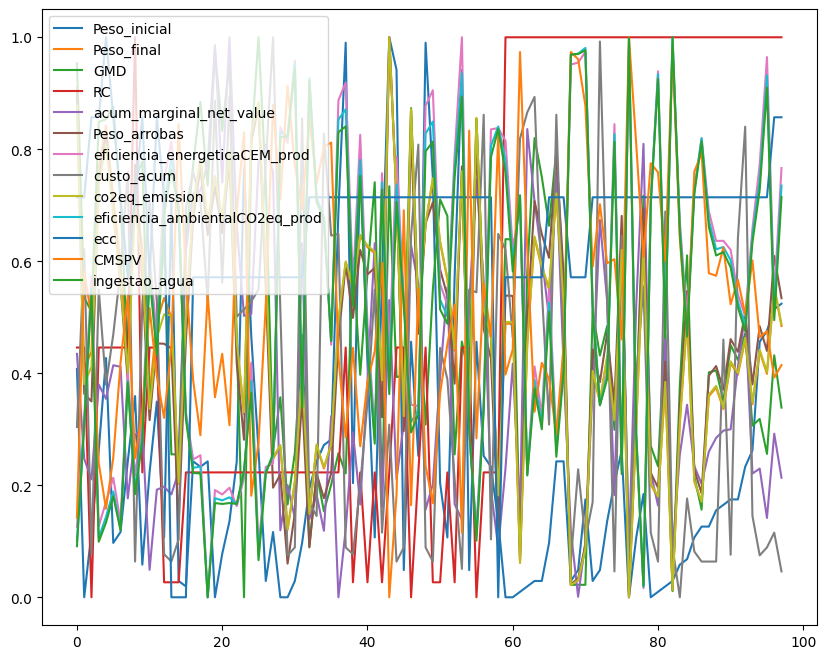


V1 



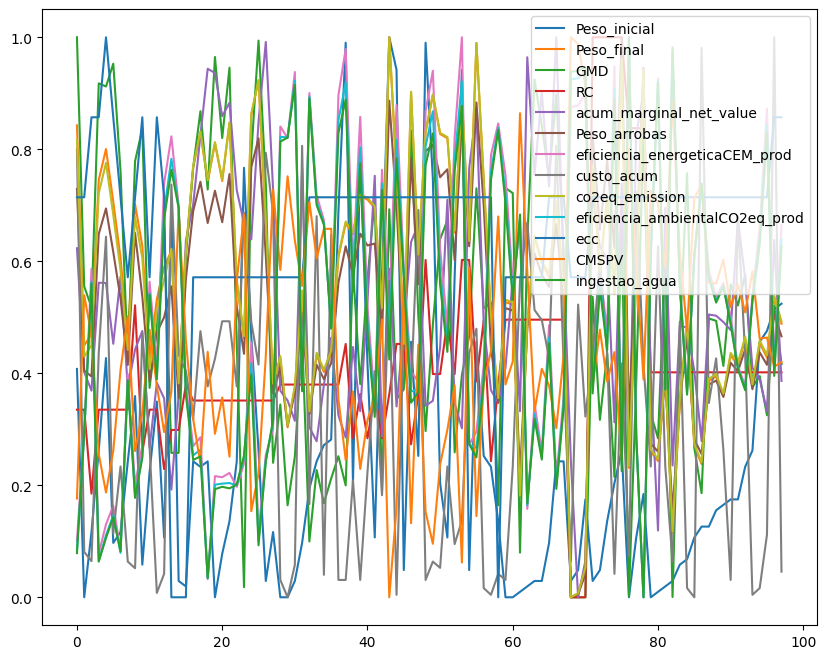


V2 



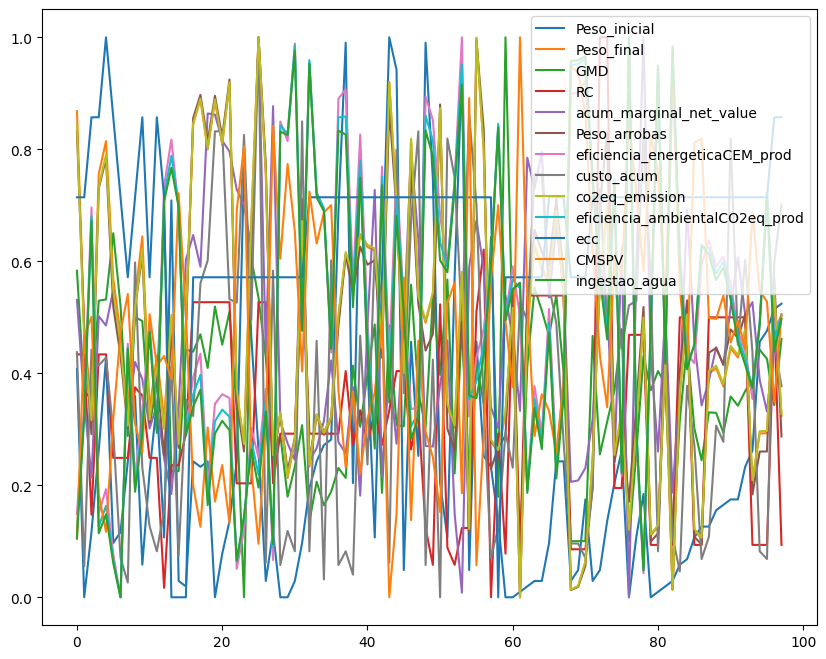


V3 



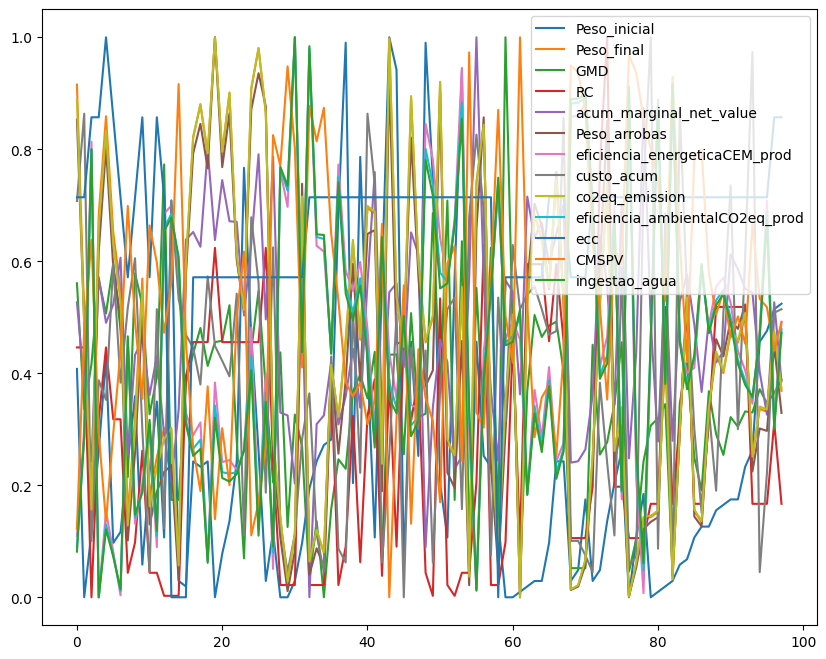

In [17]:
for tipo_venda in tipo_venda_list:
  temp_df = tipo_venda.reset_index(drop=True)
  print(temp_df['tipo_venda'].unique()[0], "\n")
  temp_df = temp_df[[item for item in first_list if item in vars_list]]
  temp_df = temp_df[vars_list]
  temp_df.plot(figsize = (10,8))
  plt.show()
  print()

In [15]:
for tipo_venda in normalized_list:
  temp_df = tipo_venda.reset_index(drop=True)
  print(temp_df['tipo_venda'].unique()[0], "\n")
  temp_df = temp_df[[item for item in first_list if item in vars_list]]
  temp_df = temp_df[vars_list]
  temp_df.plot(figsize = (10,8))
  plt.show()
  print()

4